In [0]:
import urllib.request 
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz") 
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1720106335000


In [0]:
#part3
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import re

spark = SparkSession.builder.appName("assignment3").getOrCreate()
RDD=spark.sparkContext.textFile("/kdd/kddcup_data.gz")
RDD.take(10)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,

In [0]:
print(f'type of the data: {type(RDD)}')

type of the data: <class 'pyspark.core.rdd.RDD'>


In [0]:
#part 4
RDD_split=RDD.map(lambda x:x.split(',')) #split the data
feature_list = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

titles=feature_list
titles.append("label")

df = RDD_split.toDF(titles)
print(f"features num: {len(df.columns)}")


features num: 42


In [0]:
#part5
df_extract = df["duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "label"]
df_extract.printSchema()
RDD_new = df_extract.rdd
RDD_new.take(10)

root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)



[Row(duration='0', protocol_type='tcp', service='http', src_bytes='181', dst_bytes='5450', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='239', dst_bytes='486', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='235', dst_bytes='1337', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='219', dst_bytes='1337', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='217', dst_bytes='2032', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='217', dst_bytes='2032', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='212', dst_bytes='1940', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', service='http', src_bytes='159', dst_bytes='4087', flag='SF', label='normal.'),
 Row(duration='0', protocol_type='tcp', s

protocol_type,count
udp,20354
tcp,190065
icmp,283602


service,count
tftp_u,1
pm_dump,1
red_i,1
tim_i,7
X11,11
urh_i,14
IRC,43
Z39_50,92
netstat,95
ctf,97


<Axes: title={'center': 'Service Counts'}, xlabel='service'>

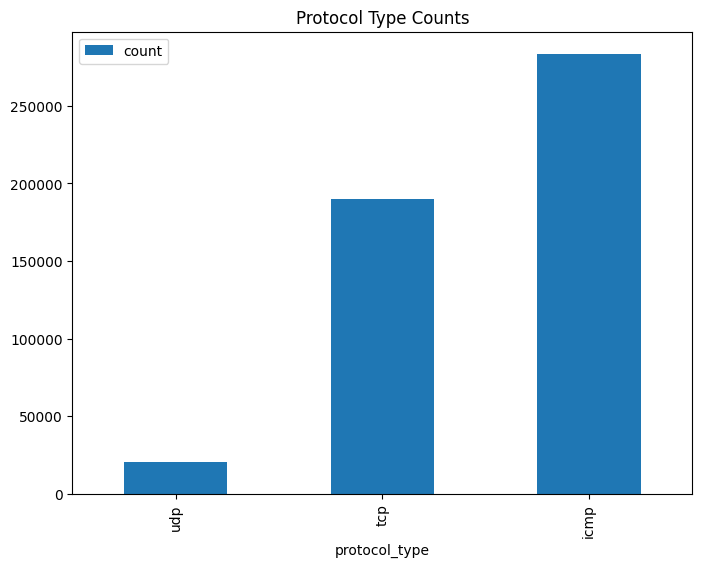

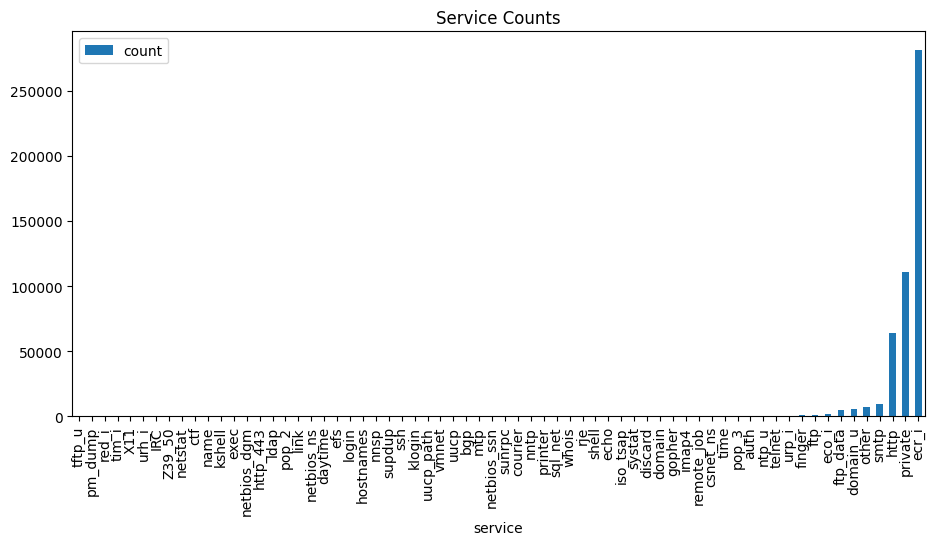

In [0]:
#part6
df_protocol = df_extract.groupBy("protocol_type").count().sort("count", ascending = True)
display(df_protocol)
pd_protocol=df_protocol.toPandas()
pd_protocol.plot.bar(x='protocol_type',y='count',figsize = (8, 6), title="Protocol Type Counts")

df_service = df_extract.groupBy("service").count().sort("count", ascending = True)
display(df_service)
pd_service=df_service.toPandas()#change to pandas in order to plot
pd_service.plot.bar(x='service',y='count',figsize = (11, 5), title="Service Counts")

label,count
spy.,2
perl.,3
phf.,4
multihop.,7
ftp_write.,8
loadmodule.,9
rootkit.,10
imap.,12
warezmaster.,20
land.,21


<Axes: title={'center': 'label Type Counts'}, xlabel='label'>

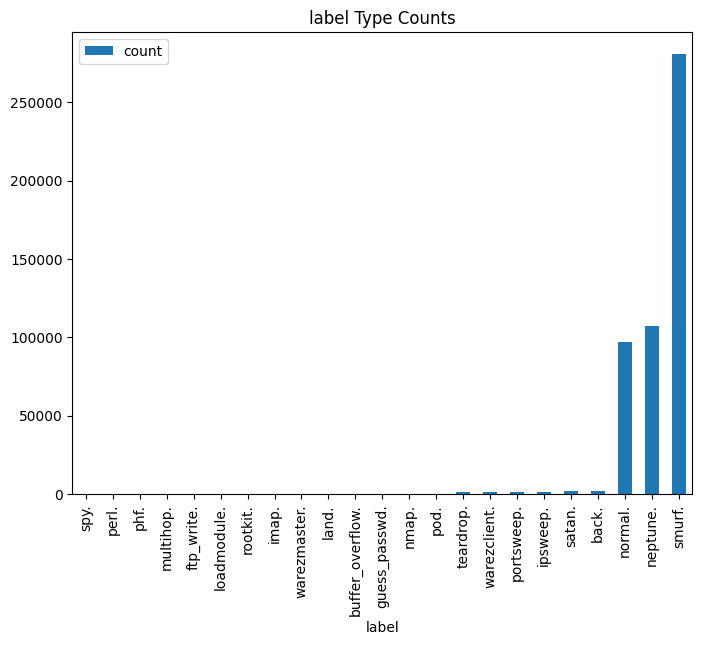

In [0]:
#part7
df_label = df_extract.groupBy("label").count().sort("count", ascending = True)
display(df_label)
pd_label=df_label.toPandas()
pd_label.plot.bar(x='label',y='count',figsize = (8, 6), title="label Type Counts")

label,count
portsweep.,1
guess_passwd.,2
spy.,2
perl.,3
phf.,4
imap.,6
multihop.,7
ftp_write.,8
loadmodule.,9
rootkit.,10


<Axes: title={'center': 'Label Counts for SF Flag'}, xlabel='label'>

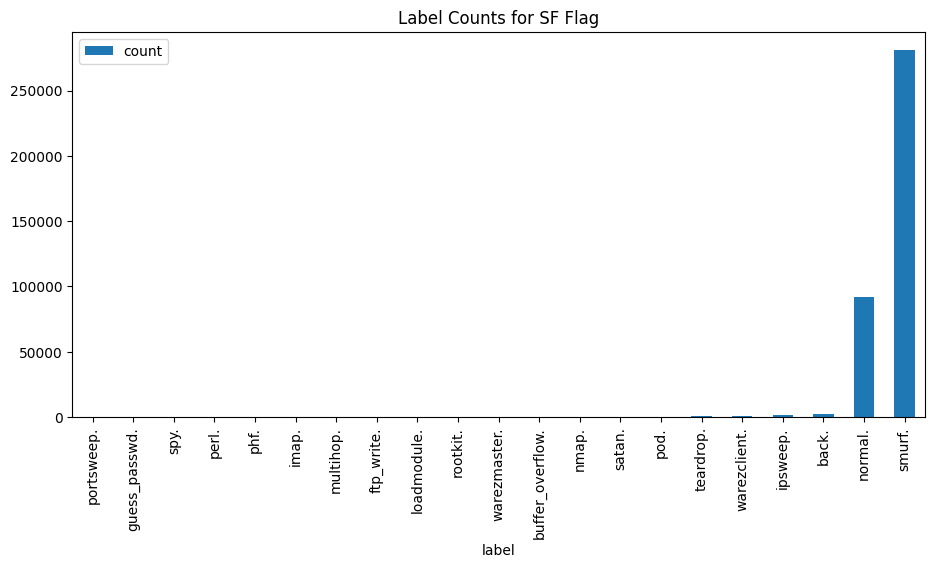

In [0]:
# Filter the DataFrame where the flag is 'SF'
df_lf = df_extract.filter(df_extract.flag == "SF").groupBy('label').count().sort('count', ascending=True)
display(df_lf)
# Convert to Pandas DataFrame for plotting
pd_lf = df_lf.toPandas()
pd_lf.plot.bar(x='label', y='count', figsize=(11, 5), title="Label Counts for SF Flag")


flag,count
OTH,8
S3,10
RSTOS0,11
S2,24
S1,57
SH,107
RSTO,579
RSTR,903
REJ,26875
S0,87007


<Axes: title={'center': 'flag Type Counts'}, xlabel='flag'>

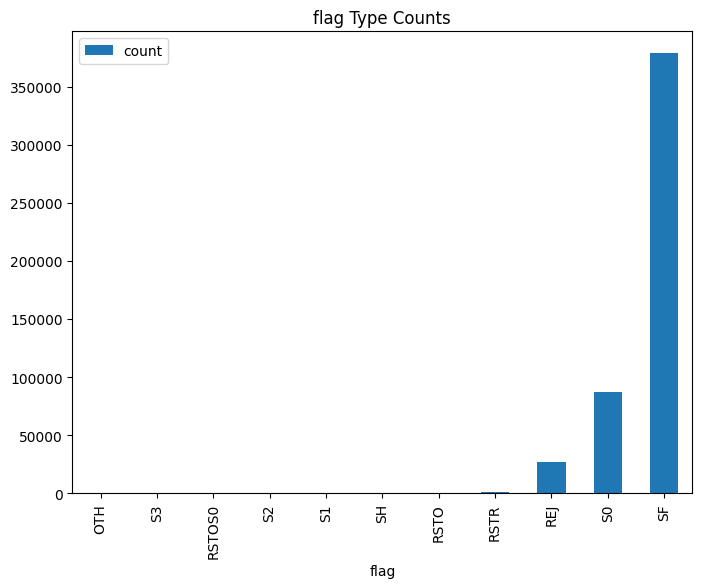

In [0]:
df_flag = df_extract.groupBy("flag").count().sort("count", ascending = True)
display(df_flag)
pd_flag=df_flag.toPandas()
pd_flag.plot.bar(x='flag',y='count',figsize = (8, 6), title="flag Type Counts")

In [0]:
#part 8
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

df_new = df_extract.withColumn('new_label', when(df_extract.label == 'normal.', 1).otherwise(0))
df_new = df_new.withColumn('duration', col('duration').cast('int')) \
               .withColumn('src_bytes', col('src_bytes').cast('int')) \
               .withColumn('dst_bytes', col('dst_bytes').cast('int'))
# df_new.show()

#split data
train_df, test_df = df_new.randomSplit([0.7, 0.3], seed=42) #0.7 train, 0.3 test
selected_columns = ['duration', 'src_bytes', 'dst_bytes', 'new_label'] #use the three columns to create the training and test datasets
train_df = train_df.select(selected_columns)
test_df = test_df.select(selected_columns)

# train the model
assembler = VectorAssembler(inputCols=['duration', 'src_bytes', 'dst_bytes'], outputCol='features')
svc = LinearSVC(labelCol='new_label', featuresCol='features')
pipeline = Pipeline(stages=[assembler, svc])
model = pipeline.fit(train_df)

# evaluate the model
predictions = model.transform(test_df)
evaluator = BinaryClassificationEvaluator(labelCol='new_label')

accuracy = predictions.filter(predictions.new_label == predictions.prediction).count() / float(test_df.count())
recall = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: 0.8272343752105994
Recall: 0.9469671052663086
